In [1]:
%reload_ext autoreload
%autoreload 2

from pathlib import Path
from mgclass import analysis, MusicGenreDataset, networks
from mgclass.utils import *
from mgclass.training import TrainingRun

In [2]:
dry_run = False
epochs = 10
repeat_count = 100

Using genre from playlist source
Dups for 0-6:   1
Dups for 0-7:   1
Dups for 1-4:  10
Dups for 2-7:   3
Dups for 5-7:   1
Clamping dataset to 160 songs per class. Removing 279 songs.
Preprocessing complete


Creating dataset:   0%|          | 0/1280 [00:00<?, ?it/s]

Dataset creation finished in: 112.2773 seconds


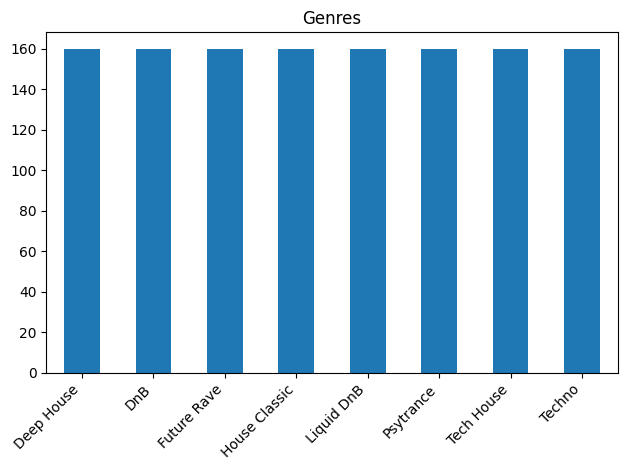

In [3]:
dataset = MusicGenreDataset(
        data_dir=Path("/home/georg/Music/ADL/"),
        preprocess=create_spectrogram(n_mels=128, win_length=1024),
        file_transform=mp3_to_wav_location,
        playlist_to_genre=sample_playlist_to_genre,
        transform=create_crop((128, 128)),
        dry_run = dry_run,
        #max_frames=16000*60*1
)

analysis.summarize_dataset(dataset)

Starting training for 10 epoch


  0%|          | 0.00/10.0 [00:00<?, ?epochs/s]

Epoch   1/10, train_loss: 1.976, train_acc: 0.311, val_loss: 1.927, val_acc: 0.365, in 57.03s
Epoch   2/10, train_loss: 1.880, train_acc: 0.416, val_loss: 1.856, val_acc: 0.431, in 52.44s
Epoch   3/10, train_loss: 1.829, train_acc: 0.465, val_loss: 1.810, val_acc: 0.475, in 51.53s
Epoch   4/10, train_loss: 1.790, train_acc: 0.502, val_loss: 1.770, val_acc: 0.520, in 52.12s
Epoch   5/10, train_loss: 1.760, train_acc: 0.534, val_loss: 1.768, val_acc: 0.507, in 52.28s
Epoch   6/10, train_loss: 1.735, train_acc: 0.559, val_loss: 1.742, val_acc: 0.538, in 51.05s
Epoch   7/10, train_loss: 1.716, train_acc: 0.576, val_loss: 1.699, val_acc: 0.585, in 52.73s
Epoch   8/10, train_loss: 1.700, train_acc: 0.590, val_loss: 1.697, val_acc: 0.584, in 50.40s
Epoch   9/10, train_loss: 1.694, train_acc: 0.594, val_loss: 1.679, val_acc: 0.604, in 50.64s
Epoch  10/10, train_loss: 1.677, train_acc: 0.610, val_loss: 1.688, val_acc: 0.590, in 49.62s
Training finished in: 519.8487 seconds
test_loss: 1.668, tes

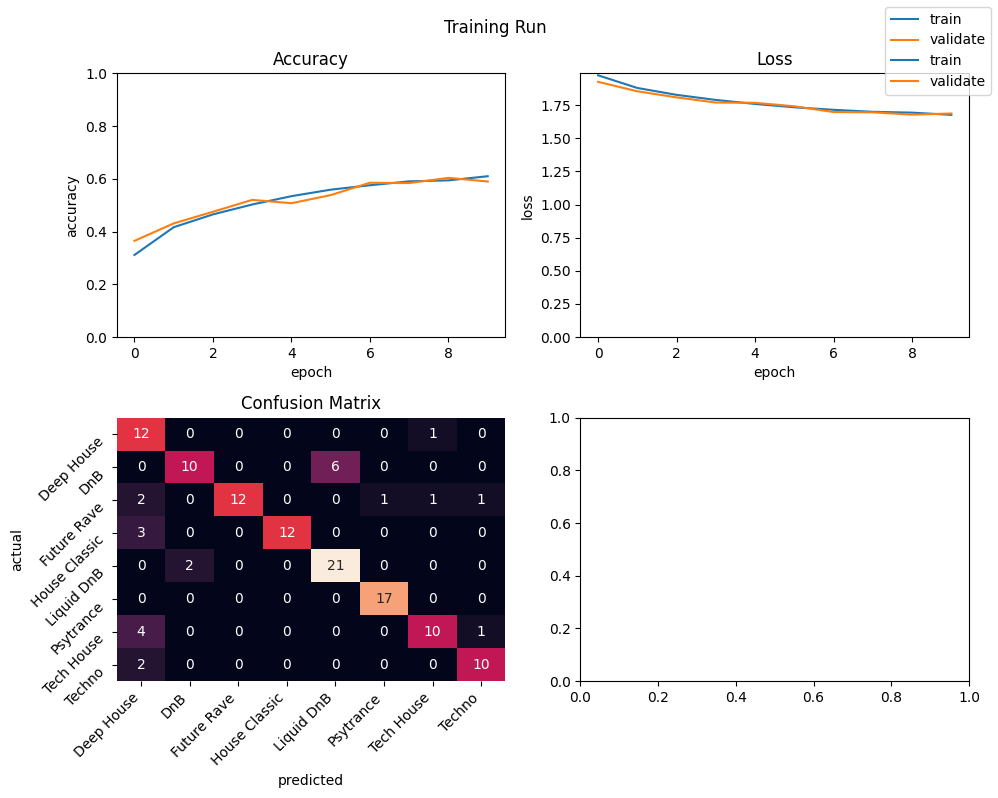

In [4]:
model = networks.MusicRecNet(dataset.num_classes)
run = TrainingRun(dataset, model, batch_size=128, epochs=epochs, dry_run=dry_run, repeat_count=repeat_count)
run.start()
run.test()
run.plot()